In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import warnings
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
warnings.filterwarnings('ignore')

In [3]:
'''https://www.kaggle.com/ntnu-testimon/paysim1'''

'https://www.kaggle.com/ntnu-testimon/paysim1'

In [4]:
data = pd.read_csv('./data/PS_20174392719_1491204439457_log.csv')

In [5]:
display(data.head())
data.shape

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


(6362620, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
for column_name in data.columns.values:
    data_sizes = data.groupby(column_name).size()
    total_count = data[column_name].shape
    unique_values = list(data_sizes.index)
    print('Column: %s, Total count: %d, Unique categories count: %d' %(column_name, total_count[0], len(unique_values)))

Column: step, Total count: 6362620, Unique categories count: 743
Column: type, Total count: 6362620, Unique categories count: 5
Column: amount, Total count: 6362620, Unique categories count: 5316900
Column: nameOrig, Total count: 6362620, Unique categories count: 6353307
Column: oldbalanceOrg, Total count: 6362620, Unique categories count: 1845844
Column: newbalanceOrig, Total count: 6362620, Unique categories count: 2682586
Column: nameDest, Total count: 6362620, Unique categories count: 2722362
Column: oldbalanceDest, Total count: 6362620, Unique categories count: 3614697
Column: newbalanceDest, Total count: 6362620, Unique categories count: 3555499
Column: isFraud, Total count: 6362620, Unique categories count: 2
Column: isFlaggedFraud, Total count: 6362620, Unique categories count: 2


In [8]:
def show_ratio(data, column):
    data_sizes = data.groupby(column).size()
    total_count = data[column].shape
    unique_values = list(data_sizes.index)
    print('Total count: %d, Unique categories count: %d' %(total_count[0], len(unique_values)))
    sizes_p = []
    for s in data_sizes:
        sizes_p.append(s*100/total_count[0])
    fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))
    wedges, texts, autotexts = plt.pie(sizes_p, labels=unique_values, autopct='%.5f%%', shadow=False)
    legend_values = []
    for (i, uv) in enumerate(unique_values):
        legend_values.append('%s : %.5f%%, abs value: %d' %(uv, sizes_p[i], data_sizes[uv]))
    ax.legend(wedges, legend_values,
              title="Unique Values",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title("Unique Values on column: " + column)
    plt.show()

Total count: 6362620, Unique categories count: 5


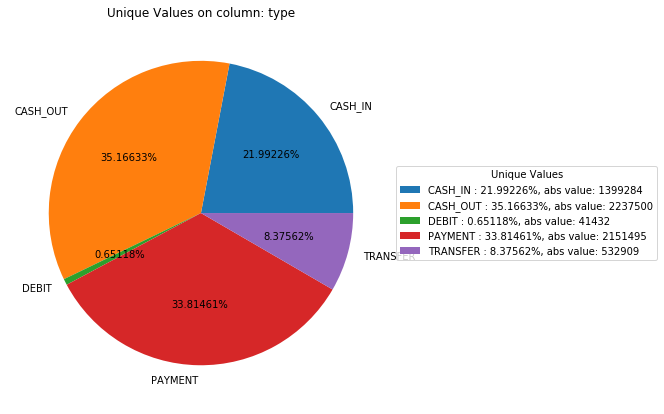

Total count: 6362620, Unique categories count: 2


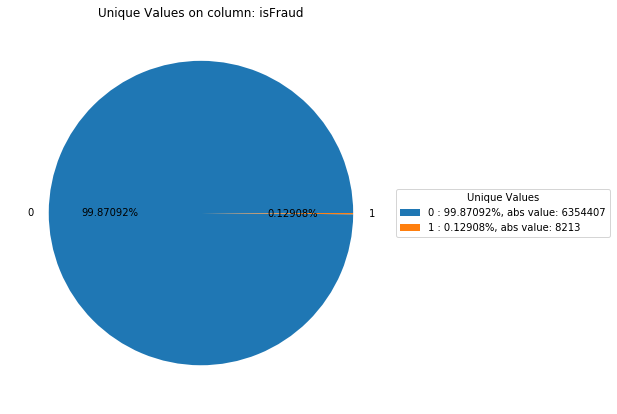

Total count: 6362620, Unique categories count: 2


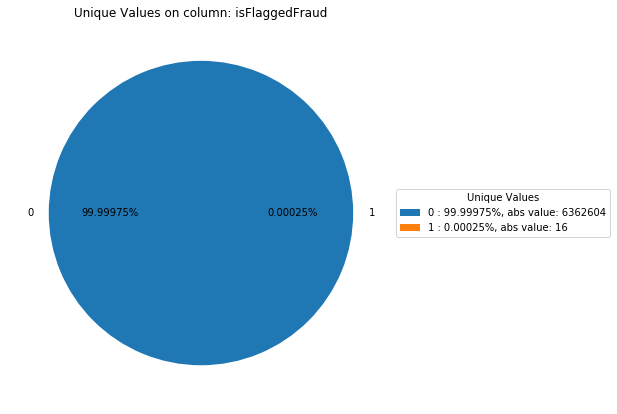

In [9]:
show_ratio(data, 'type')
show_ratio(data, 'isFraud')
show_ratio(data, 'isFlaggedFraud')

In [11]:
df = data.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [ ]:
class Net(nn.Module):
    def __init__(self, input_dim=IN_DIM, out_dim=OUT_DIM, layer_size=40):
        super(Net, self).__init__()
        self.encoder = nn.Linear(input_dim, layer_size)
        self.decoder = nn.Linear(layer_size, out_dim)

    def forward(self, x):
        x = F.tanh(self.fc(x))
        x = self.logit(x)
        return x